In [62]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [63]:
from tensorflow.keras.optimizers import RMSprop

In [27]:
pip install opencv-python

     |████████████████████████████████| 46.4 MB 98.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
img = image.load_img("/Users/yileifisher/Desktop/basedata/training/notwell/Scola Rafael-not-well-R_XpRDBCp28CucUoh_16578151134111430738556400839034.jpg")

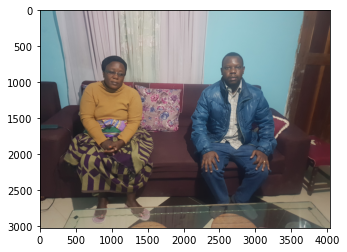

In [12]:
plt.imshow(img)

In [17]:
cv2.imread("/Users/yileifisher/Desktop/basedata/training/notwell/Scola Rafael-not-well-R_XpRDBCp28CucUoh_16578151134111430738556400839034.jpg").shape

(3024, 4032, 3)

In [20]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [68]:
train_dataset = train.flow_from_directory('/Users/yileifisher/Desktop/basedata/training/',
                                          target_size = (200,200),
                                          batch_size = 3, 
                                          class_mode = 'binary')
validation_dataset = train.flow_from_directory('/Users/yileifisher/Desktop/basedata/validation/',
                                               target_size = (200,200),
                                               batch_size = 3, 
                                               class_mode = 'binary')

Found 93 images belonging to 2 classes.
Found 7 images belonging to 2 classes.


In [22]:
train_dataset.class_indices

{'notwell': 0, 'well': 1}

In [45]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation ='sigmoid')
                                    ])

In [71]:
model.compile(loss='binary_crossentropy',
  optimizer = RMSprop(lr=0.001),
  metrics =['accuracy'])

In [72]:
model_fit = model.fit(train_dataset,
                     step_per_epoch = 3,
                     epochs= 10,
                     validation_data = validation_dataset)

TypeError: fit() got an unexpected keyword argument 'step_per_epoch'

In [70]:
dir_path = '/Users/yileifisher/Desktop/basedata/test'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("you are not well")
        else
        print("you are well")
        
        

SyntaxError: invalid syntax (<ipython-input-70-9a9d784bc5ab>, line 13)